<a href="https://colab.research.google.com/github/SikokBagiDuo69/TSDN/blob/main/Sikok_Bagi_Duo_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Detection Using Mask or Not 
Dataset :
https://urlis.net/datasetFace <br>
<br>
<p align ="justify">Proses pengerjaan dilakukan dengan menggunakan Google Collab supaya lebih mudah dalam pengerjaannya dibandingkan Jupyter karena bisa saling berbagi antar satu anggota. </p>
<br>

<p>Latar Belakang : </p>
<p align ="justify"> Baru-baru ini, kasus Covid-19 bertambah kembali setelah sebelumnya sempat menurun dan sebelumnya pemerintah sudah memutuskan bahwa masyarakat dapat melepaskan masker. Meskipun begitu, dengan naiknya kasus Covid-19 dan demi keamanan masyarakat, maka alangkah baiknya apabila masyarakat diharapkan selalu memakai masker di segala kondisi dan tempat.</p>
<br>
<p> Tujuan: </p>
<p align ="justify"> Diharapkan dengan adanya alat deteksi penggunaan masker atau tidak, maka pihak yang berwenang dapat melakukan tindakan untuk mengingatkan dan memantau masyarakat secara berkala sehingga budaya untuk mengenakan masker dalam era setelah covid-19 untuk selalu menjaga kesehatan seluruh warga negara bisa dilakukan </p>



### Install Library
Hal pertama yang perlu dilakukan adalah import library yang dibutuhkan untuk pengerjaan. Disini library yang akan digunakan adalah OpenCV, TensorFlow, Keras, dan Imutils

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#Clone the OpenCV repository
!git clone https://github.com/opencv/opencv
!git clone https://github.com/opencv/opencv_contrib

#Create a build folder and navigate to it  
!mkdir build
%cd build

Cloning into 'opencv'...
remote: Enumerating objects: 311347, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 311347 (delta 28), reused 85 (delta 10), pack-reused 311215
Receiving objects: 100% (311347/311347), 499.13 MiB | 25.85 MiB/s, done.
Resolving deltas: 100% (216682/216682), done.
Checking out files: 100% (7264/7264), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 38017, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 38017 (delta 151), reused 212 (delta 112), pack-reused 37721
Receiving objects: 100% (38017/38017), 133.36 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (23618/23618), done.
Checking out files: 100% (3067/3067), done.
/content/build


In [ ]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
cv2.__version__

'4.6.0'

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
print(keras.__version__)

2.9.0


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Tahapan dalam  Melakukan Mask Detector
Beberapa tahapan yang dilakukan adalah sebagai berikut
1. Gunakan dataset wajah tanpa masker dan dengan masker
2. Buat model yang sesuai dengan menggunakan library
3. Deteksi Wajah, Bounding Box
4. Crop bagian wajah dalam bentuk ROI (*Region Of Interest*)
5. Lakukan Detect Facial Landmark

Dataset yang digunakan adalah dataset dengan masker dan dataset tanpa masker yang diperoleh dari link: <br>
 https://urlis.net/datasetFace
 <p> Overview dari dataset tanpa masker adalah sebagai berikut <p>
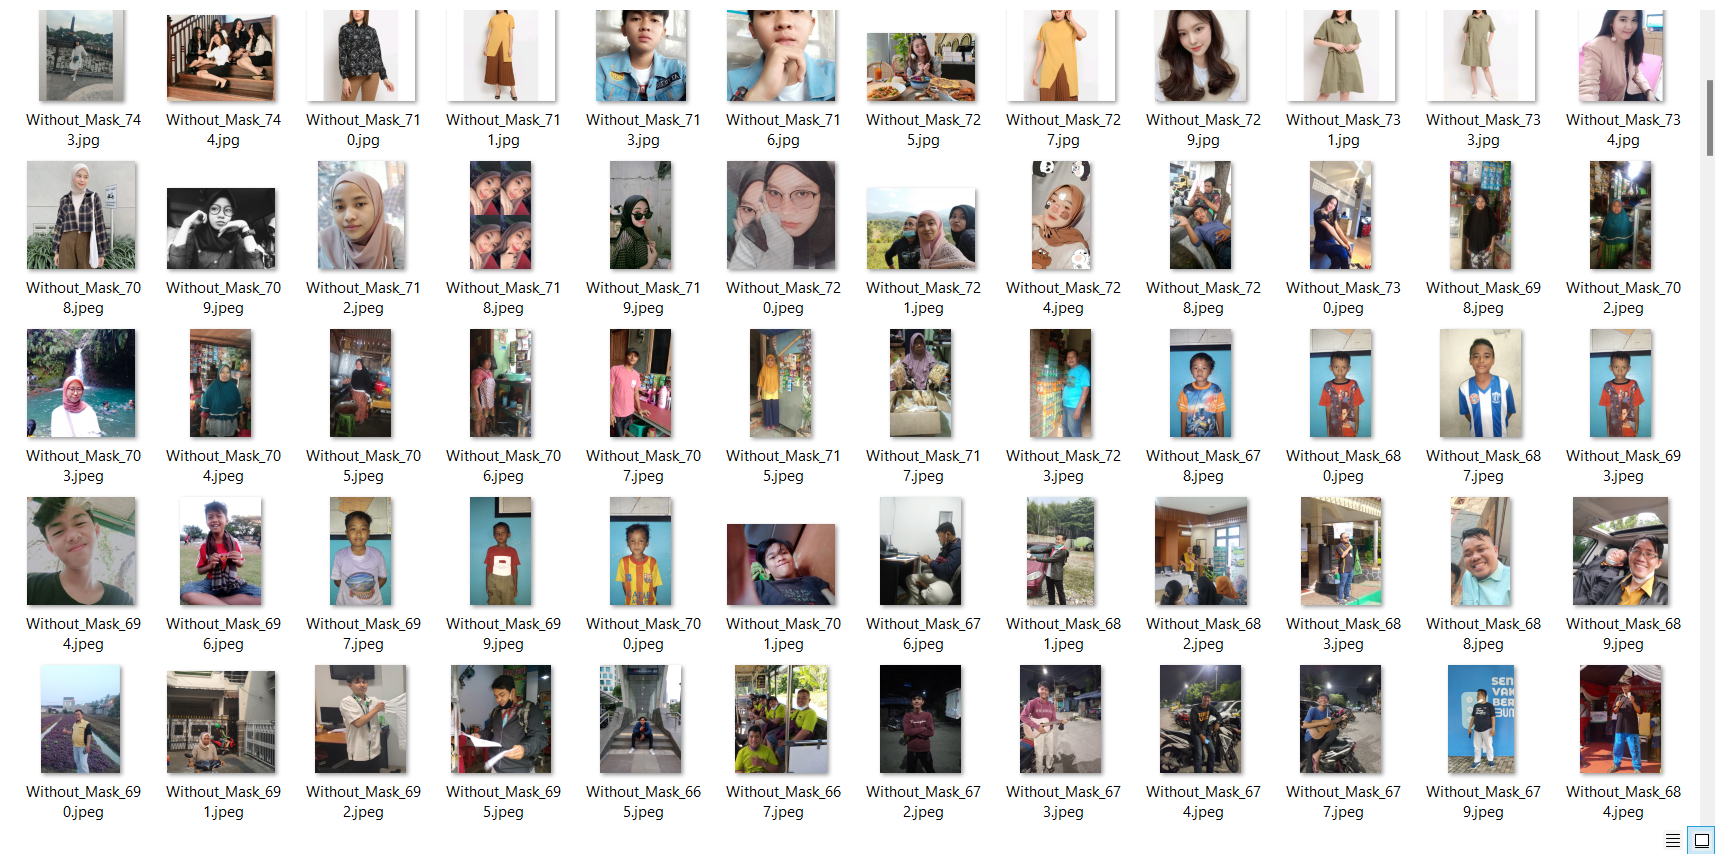

Overview dari data dengan masker adalah sebagai berikut: <br>
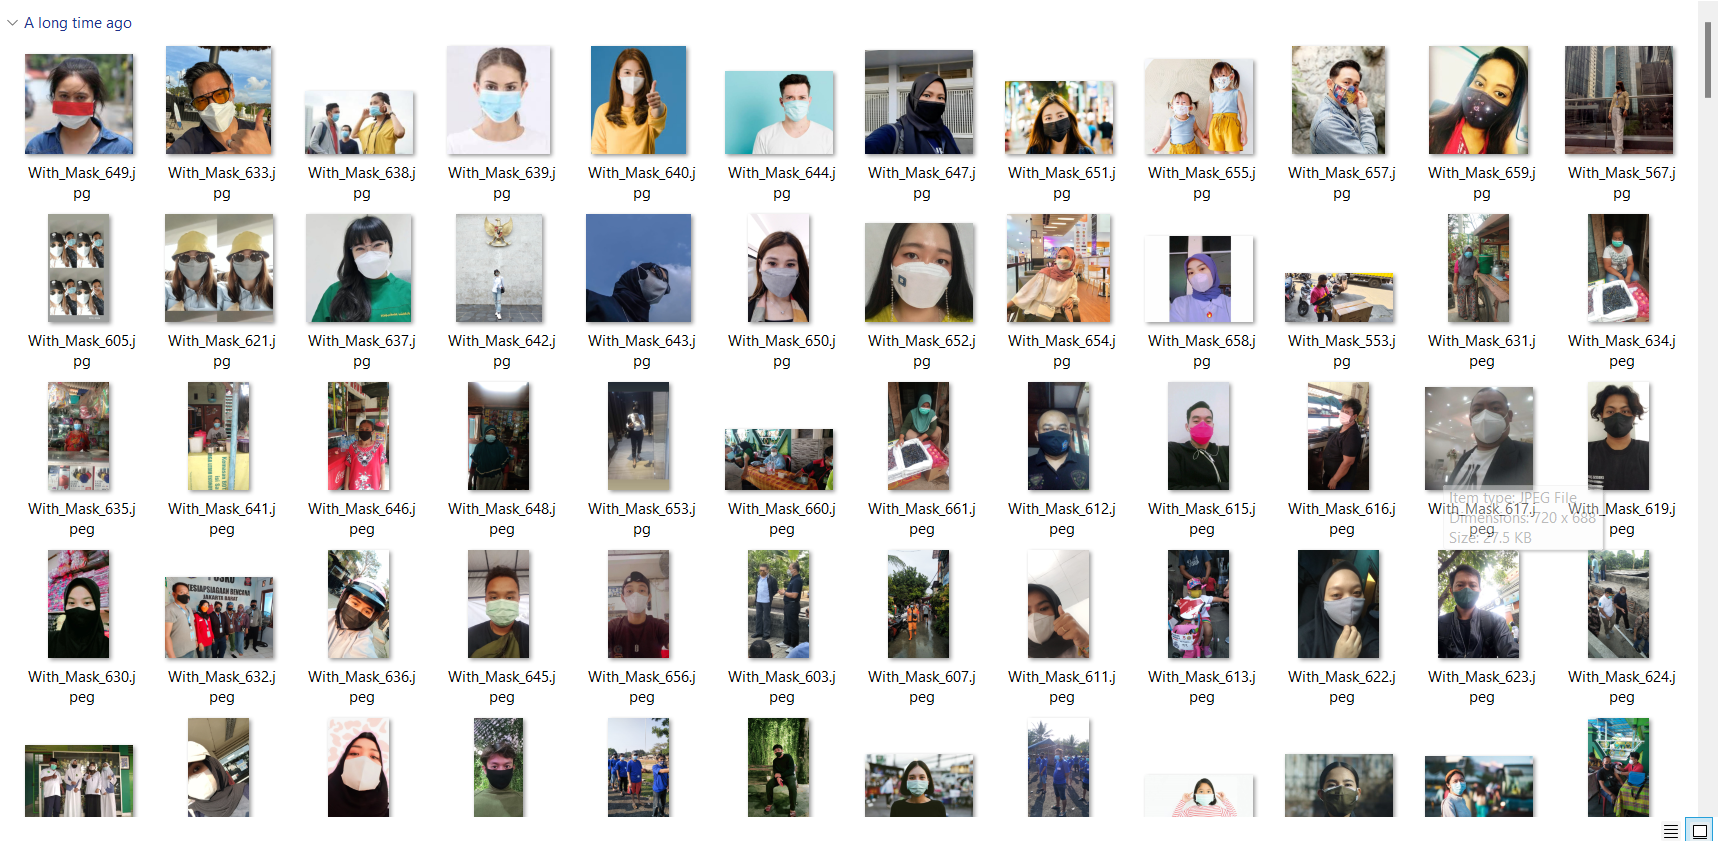

Dataset : <br>
- Tanpa masker : 745
- Dengan masker : 661 

## Train Mask Detector

Import Dataset

Kode yang dibuat untuk melakukan train test model adalah sebagai berikut

In [ ]:
# # Note : Program ini tidak bisa dijalankan disini karena akan error dan perlu dibuka di command prompt

# # import the necessary packages

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import AveragePooling2D
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from imutils import paths
# import matplotlib.pyplot as plt
# import numpy as np
# import argparse
# import os

# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset")
# ap.add_argument("-p", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# ap.add_argument("-m", "--model", type=str,
# 	default="mask_detector.model",
# 	help="path to output face mask detector model")
# args = vars(ap.parse_args())

# # initialize the initial learning rate, number of epochs to train for,
# # and batch size
# INIT_LR = 1e-4
# EPOCHS = 20
# BS = 32

# # grab the list of images in our dataset directory, then initialize
# # the list of data (i.e., images) and class images
# print("[INFO] loading images...")
# imagePaths = list(paths.list_images(args["dataset"]))
# data = []
# labels = []

# # loop over the image paths
# for imagePath in imagePaths:
# 	# extract the class label from the filename
# 	label = imagePath.split(os.path.sep)[-2]

# 	# load the input image (224x224) and preprocess it
# 	image = load_img(imagePath, target_size=(224, 224))
# 	image = img_to_array(image)
# 	image = preprocess_input(image)

# 	# update the data and labels lists, respectively
# 	data.append(image)
# 	labels.append(label)

# # convert the data and labels to NumPy arrays
# data = np.array(data, dtype="float32")
# labels = np.array(labels)

# # perform one-hot encoding on the labels
# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)

# # partition the data into training and testing splits using 75% of
# # the data for training and the remaining 25% for testing
# (trainX, testX, trainY, testY) = train_test_split(data, labels,
# 	test_size=0.20, stratify=labels, random_state=42)

# # construct the training image generator for data augmentation
# aug = ImageDataGenerator(
# 	rotation_range=20,
# 	zoom_range=0.15,
# 	width_shift_range=0.2,
# 	height_shift_range=0.2,
# 	shear_range=0.15,
# 	horizontal_flip=True,
# 	fill_mode="nearest")

# # load the MobileNetV2 network, ensuring the head FC layer sets are
# # left off
# baseModel = MobileNetV2(weights="imagenet", include_top=False,
# 	input_tensor=Input(shape=(224, 224, 3)))

# # construct the head of the model that will be placed on top of the
# # the base model
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(2, activation="softmax")(headModel)

# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
# model = Model(inputs=baseModel.input, outputs=headModel)

# # loop over all layers in the base model and freeze them so they will
# # *not* be updated during the first training process
# for layer in baseModel.layers:
# 	layer.trainable = False

# # compile our model
# print("[INFO] compiling model...")
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])

# # train the head of the network
# print("[INFO] training head...")
# H = model.fit(
# 	aug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX) // BS,
# 	epochs=EPOCHS)

# # make predictions on the testing set
# print("[INFO] evaluating network...")
# predIdxs = model.predict(testX, batch_size=BS)

# # for each image in the testing set we need to find the index of the
# # label with corresponding largest predicted probability
# predIdxs = np.argmax(predIdxs, axis=1)

# # show a nicely formatted classification report
# print(classification_report(testY.argmax(axis=1), predIdxs,
# 	target_names=lb.classes_))

# # serialize the model to disk
# print("[INFO] saving mask detector model...")
# model.save(args["model"], save_format="h5")

# # plot the training loss and accuracy
# N = EPOCHS
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# plt.savefig(args["plot"])


Program di atas dimasukkan dalam file .py yang diberi nama **train_mask_detector.py**